In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h2> Loading and concating data </h2>

In [2]:
data = []
for i in range(1,6):
    tmp_df = pd.read_csv(f'data/data{i}.csv')
    tmp_df.columns =['Artist', 'Name', 'Year', 'Popularity', 'genre', 'lyrics'] 
    data.append(tmp_df)
df = pd.concat(data,ignore_index=True, sort=True)

In [3]:
# replace \r\n with space in Lyrics
df.lyrics = df.lyrics.str.replace('\r\n', ' ')

In [4]:
# extract gener
df.genre = df.genre.apply(lambda x: x[7:x.find('").setTar')])

In [5]:
df.genre.unique()

array(['Rock', 'Pop', 'Other', 'Country', 'RB', '', 'HipHop', 'Jazz',
       'Folk', 'Electronic', 'Indie'], dtype=object)

In [6]:
# sepaarate mising genre
df_mis_gen = df[df.genre ==""]
df = df[df.genre !=""]

In [7]:
#fixing Bob Marley's genre
bob = df_mis_gen[df_mis_gen.Artist == 'Bob Marley']
bob.genre = 'Folk'
df = pd.concat([df,bob],ignore_index=True, sort=True)

In [8]:
#fixing Zack Knight's genre
zak = df_mis_gen[df_mis_gen.Artist == 'Zack Knight']
zak.genre = 'RB'
df = pd.concat([df,zak],ignore_index=True, sort=True)

In [9]:
# saving missing genre
df_mis_gen.to_csv("missing_genre.csv")

In [10]:
# saving rows that contain missing values
df[df.isnull().values.any(axis=1)].to_csv('mising_val.csv')

In [11]:
#dropp mising value containing rows
df = df[~df.isnull().values.any(axis=1)]

In [12]:
# save dublicated rows
df[df[['Artist', 'Name' ]].duplicated()].sort_values(['Artist', 'Name' ]).to_csv('dublicated.csv')

In [13]:
#drop duplicates
df = df[~df[['Artist', 'Name' ]].duplicated()]

<h2> four informative visualizations </h2>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from matplotlib.pyplot import figure
%matplotlib Inline

<h2> The avarage popularity af every gener </h2>

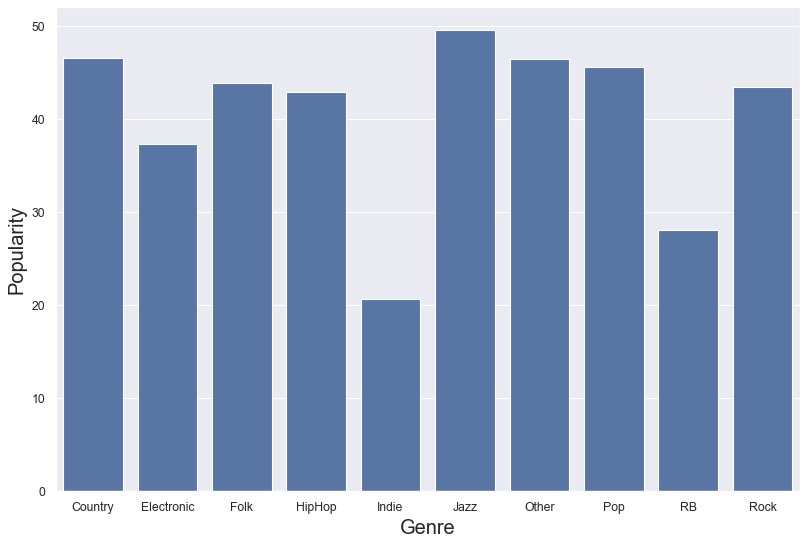

In [15]:
tmp = df[['genre','Popularity']].groupby('genre').mean()
fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x=tmp.index, y=tmp.Popularity, color='b');
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

<h3> The chart show that Indie, R&B and Electronic are the most unpopular genres oppositely Jazz which of course the most popular for all times </h3>

In [16]:
from ipywidgets import interact, widgets

<h2> Time serries that shows yearly mad 

In [126]:
grouped_mean = df[['Year','genre','Popularity']].groupby(['Year','genre']).mean()
grouped_count = df[['Year','genre','Popularity']].groupby(['Year','genre']).count()
def plotyear(year): 
    fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
    x = grouped_count.loc[year].Popularity
    y = grouped_mean.loc[year].Popularity
    ax = sns.scatterplot(x=x, y=y, s=250)
    plt.xlabel('Number of songs in that genre', fontsize=20)
    plt.ylabel('Avarage popularity of genre', fontsize=20)
    for i in list(list(x.index)):
        ax.text(x[i],y[i],i, fontsize=35, verticalalignment='bottom')

In [127]:
interact(plotyear, year=widgets.IntSlider(min=1990, max=2018, step=1, value=2010));

interactive(children=(IntSlider(value=2010, description='year', max=2018, min=1990), Output()), _dom_classes=(…

<h2> The 

['Country',
 'Electronic',
 'Folk',
 'HipHop',
 'Indie',
 'Jazz',
 'Other',
 'Pop',
 'RB',
 'Rock']

In [18]:
len('dont worry about a thing cos everthing going to be alright')

58

In [19]:
df[df.isnull().values.any(axis=1)]

,Artist,Name,Popularity,Year,genre,lyrics


In [20]:
df[df.Artist == 'Bob Marley']

,Artist,Name,Popularity,Year,genre,lyrics
7609,Bob Marley,Everythings Gonna Be Alright Lyrics,100.000000,2012,Folk,"""Don't worry about a thing, 'Cause every littl..."
7610,Bob Marley,"Don't Worry, Be Happy Lyrics",86.283855,2008,Folk,Here is a little song I wrote You might want t...
7611,Bob Marley,No Woman No Cry Lyrics,79.889766,1984,Folk,"No, woman no cry No, woman no cry No, woman no..."
7612,Bob Marley,One Love Lyrics,79.173887,2010,Folk,"ken boral,one love,One love, one heart Let's g..."
7613,Bob Marley,Is This Love Lyrics,76.497310,1984,Folk,I wanna love you and treat you right I wanna l...
...,...,...,...,...,...,...
7679,Bob Marley,Bus Dem Shut (Pyaka) Lyrics,35.414926,2007,Folk,Life is for man to live (let man live life) Br...
7680,Bob Marley,Try Me Lyrics,34.420431,1970,Folk,"Try me, try me Try me, try me Try me, try me T..."
7681,Bob Marley,All Day All Night Lyrics,33.346295,2013,Folk,"Wohoo, Said I'd never gonna give my love to no..."
7682,Bob Marley,Misty Morning Lyrics,33.346295,2006,Folk,"Misty mornin', don't see no sun; I know you're..."
